In [46]:
import pandas as pd

input_file_path = "../outputs/results.parquet"

df = pd.read_parquet(input_file_path)

date_str = df["video_path"].str.extract(r"(\d{6})")[0]

video_date = pd.to_datetime(date_str, format="%y%m%d")

df["date"] = video_date

df.head()

,frame_idx,timestamp,beautiful_sunrise,beautiful_sunset,boring_cloudy,clear_sky,fog,good_cloudy,storm,video_path,fps,sample_rate,date
0,0,00:00,0.000225,0.000066,0.000157,0.999323,0.000027,0.000053,0.000150,input/240401_n.mp4,29.991212,10,2024-04-01
1,10,00:00,0.000314,0.000064,0.000206,0.999118,0.000031,0.000054,0.000213,input/240401_n.mp4,29.991212,10,2024-04-01
2,20,00:00,0.000227,0.000043,0.000140,0.999311,0.000028,0.000043,0.000209,input/240401_n.mp4,29.991212,10,2024-04-01
3,30,00:01,0.000141,0.000042,0.000106,0.999439,0.000020,0.000026,0.000226,input/240401_n.mp4,29.991212,10,2024-04-01
4,40,00:01,0.000135,0.000034,0.000091,0.999497,0.000021,0.000022,0.000201,input/240401_n.mp4,29.991212,10,2024-04-01


In [47]:
weather_cols = [
    "beautiful_sunrise",
    "beautiful_sunset",
    "boring_cloudy",
    "clear_sky",
    "fog",
    "good_cloudy",
    "storm",
]

pred_df = pd.DataFrame(
    {
        "frame_idx": df["frame_idx"],
        "timestamp": df["timestamp"],
        "date": df["date"],
        "weather_label": df[weather_cols].idxmax(axis=1),
        "weather_prob": df[weather_cols].max(axis=1),
    }
)

pred_df.describe()

,frame_idx,date,weather_prob
count,145675.00000,145675,145675.000000
mean,907.61929,2024-08-06 20:31:00.063840512,0.874460
min,0.00000,2024-04-01 00:00:00,0.222241
25%,440.00000,2024-06-02 00:00:00,0.795386
50%,880.00000,2024-08-02 00:00:00,0.982188
75%,1330.00000,2024-10-09 00:00:00,0.999380
max,2330.00000,2024-12-31 00:00:00,0.999999
std,559.47242,NaN,0.182573


In [48]:
label_counts_df = (
    pred_df["weather_label"]
    .value_counts()
    .reindex(weather_cols, fill_value=0)
    .reset_index()
    .rename(
        columns={
            "index": "weather_label",
            "weather_label": "count",
        }
    )
)

print(label_counts_df)

               count  count
0  beautiful_sunrise  17595
1   beautiful_sunset  12339
2      boring_cloudy  12717
3          clear_sky  11394
4                fog  22433
5        good_cloudy  49349
6              storm  19848


In [49]:
daily_weather_counts = (
    pred_df.groupby(["date", "weather_label"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

daily_sun_counts_daily = daily_weather_counts[
    ["beautiful_sunrise", "beautiful_sunset", "date"]
]

normal_weather_counts_daily = daily_weather_counts.drop(
    columns=["beautiful_sunrise", "beautiful_sunset"]
)

normal_weather_counts_daily.head()

weather_label,date,boring_cloudy,clear_sky,fog,good_cloudy,storm
0,2024-04-01,4,278,18,13,43
1,2024-04-02,278,126,2,1,1
2,2024-04-03,148,0,152,0,209
3,2024-04-04,48,0,19,0,387
4,2024-04-05,237,0,162,0,133


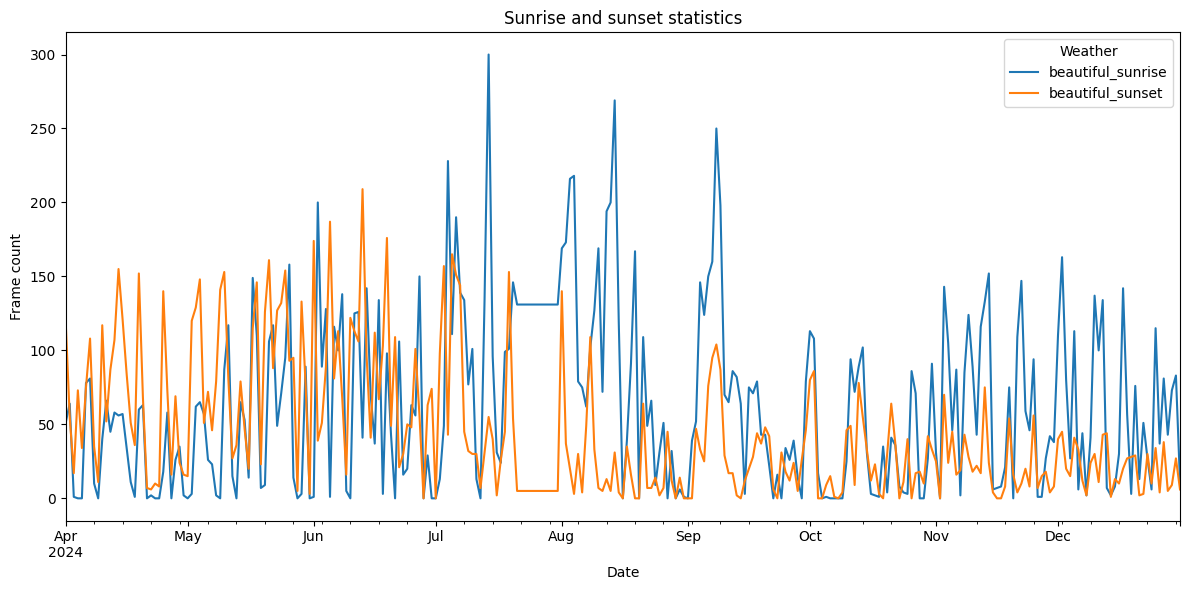

In [50]:
import matplotlib.pyplot as plt

daily_sun_counts_daily.set_index("date").plot(
    kind="line",
    figsize=(12, 6),
)

plt.xlabel("Date")
plt.ylabel("Frame count")
plt.title("Sunrise and sunset statistics")
plt.legend(title="Weather")
plt.tight_layout()
plt.show()

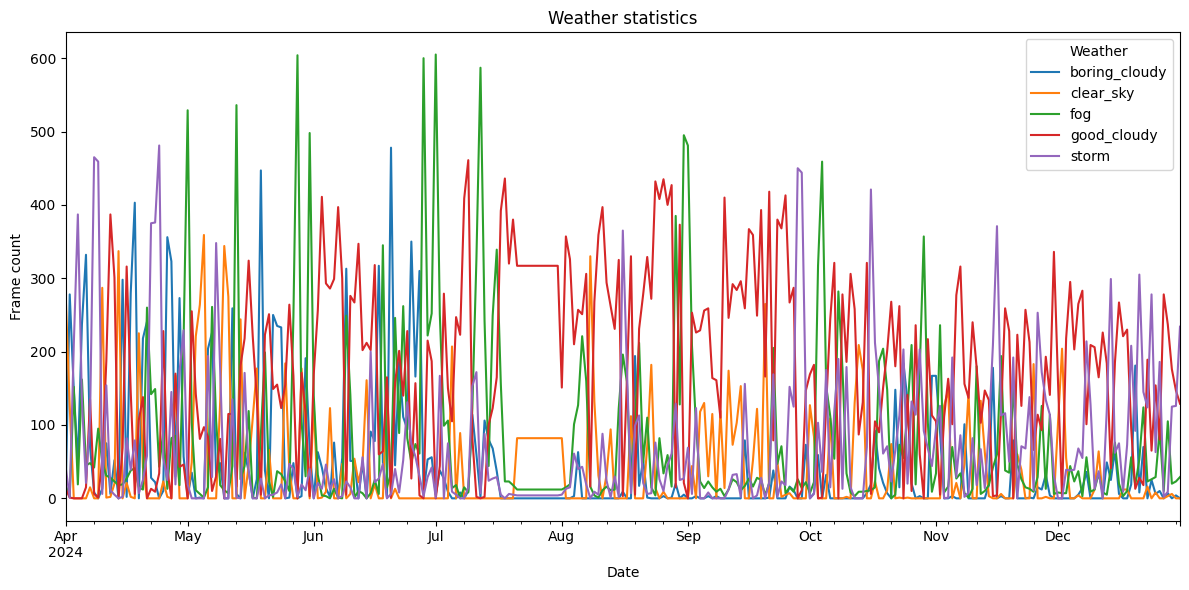

In [51]:
import matplotlib.pyplot as plt

normal_weather_counts_daily.set_index("date").plot(
    kind="line",
    figsize=(12, 6),
)

plt.xlabel("Date")
plt.ylabel("Frame count")
plt.title("Weather statistics")
plt.legend(title="Weather")
plt.tight_layout()
plt.show()